In [626]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# This part calls for the tex package with Palantino font family 
# Note latex should be installed in the system to run this
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Palatino"
})
from math import *
import time

# Problem 1

In [362]:
def sinc(x):
    if x!=0:
        return np.sin(x)/x
    else:
        return 1

xlim = 5000
n = 10001
Delta = 2*xlim/(n-1)
x = np.linspace(-xlim, xlim, n)
fx = np.vectorize(sinc,otypes=[float])(x)
k = (2*np.pi/(n*Delta))*np.arange(-(n-1)/2,(n-1)/2+1)

In [363]:
dft = np.fft.fft(fx, norm="ortho")
dft = np.fft.fftshift(dft)

In [364]:
factor = (Delta)*np.sqrt(n/(2*np.pi))*np.exp(-1j*k*np.min(x))
ft_dft = factor*dft

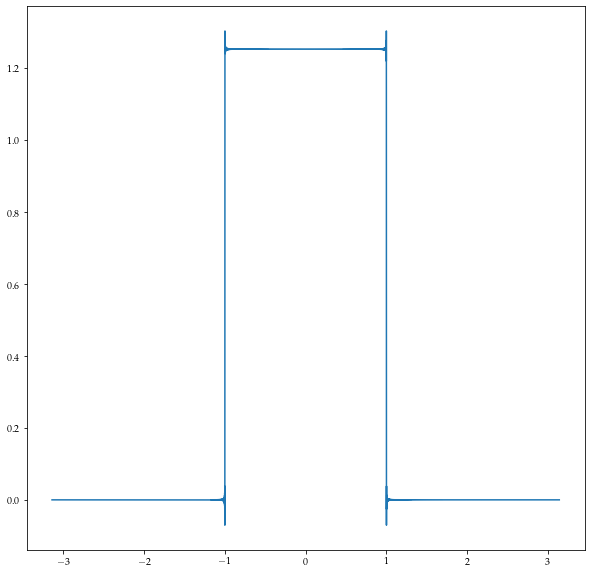

In [365]:
fig1 = plt.figure(figsize=(10,10))
plt.plot(k,np.real(ft_dft))

In [368]:
def ft_true(k):
    if np.abs(k)<1:
        return np.sqrt(np.pi/2)
    elif np.abs(k)==1:
        return 0.5*np.sqrt(np.pi/2)
    else:
        return 0

true_func = np.vectorize(ft_true,otypes=[float])(k)

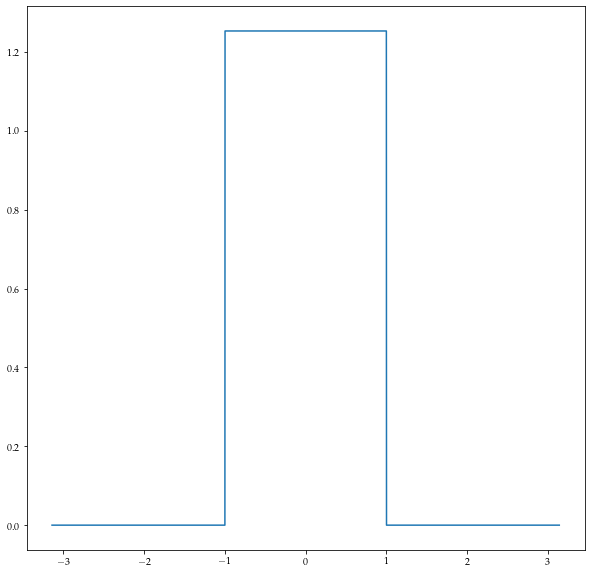

In [367]:
fig2 = plt.figure(figsize=(10,10))
plt.plot(k,true_func)

# Problem 5

In [455]:
# We will define a custom DFT function here.
# This function will also be used in problem 6.
def dft(func):
    n = np.shape(func)[0]
    omega = []
    for i in range(n):
        s = 0
        for j in range(n):
            s = s+func[j]*np.exp(-1j*2*np.pi*i*j/n)
        omega.append(s/np.sqrt(n))
    return np.array(omega)

def idft(func):
    n = np.shape(func)[0]
    omega = []
    for i in range(n):
        s = 0
        for j in range(n):
            s = s+func[j]*np.exp(1j*2*np.pi*i*j/n)
        omega.append(s/np.sqrt(n))
    return np.array(omega)

def shift(func):
    n = np.shape(func)[0]
    func = np.append(func,0)
    half = int((n-1)/2)
    func[0:half+1] , func[half+1:n+1] = func[half+1:n+1] , func[0:half+1].copy()
    func = np.delete(func,half)
    return func

shift(np.array([0,1,2,3,-3,-2,-1]))

array([-3, -2, -1,  0,  1,  2,  3])

In [395]:
num = np.random.randint(1,100,size=10)
tdft_start = time.time()
dft(num)
tdft_end = time.time()
tdft = tdft_end-tdft_start
tfft_start = time.time()
np.fft.fft(num)
tfft_end = time.time()
tfft = tfft_end-tfft_start
print("Time taken for custom DFT:",tdft,"s")
print("Time taken for numpy FFT:",tfft,"s")

Time taken for custom DFT: 0.0 s
Time taken for numpy FFT: 0.0009992122650146484 s


In [397]:
tdft = []
tfft = []
nrange = np.arange(4,101)
for n in nrange:
    num = np.random.randint(1,100,size=n)
    tdft_start = time.time()
    dft(num)
    tdft_end = time.time()
    tdft.append(tdft_end-tdft_start)
    tfft_start = time.time()
    np.fft.fft(num)
    tfft_end = time.time()
    tfft.append(tfft_end-tfft_start)

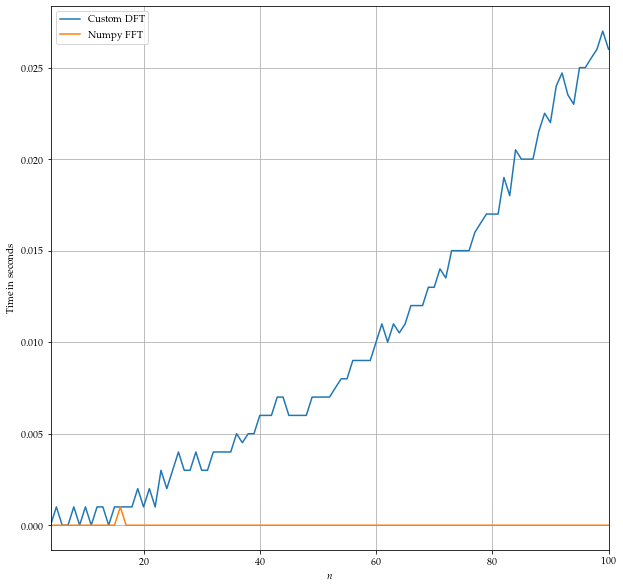

In [399]:
f1 = plt.figure(figsize=(10,10))
plt.xlabel("$n$")
plt.ylabel("Time in seconds")
plt.grid()
plt.margins(x=0)
plt.plot(nrange,tdft,label="Custom DFT")
plt.plot(nrange,tfft,label="Numpy FFT")
plt.legend()
plt.show()

# Problem 6

In [450]:
xlim = 10
n = 101
Delta = 2*xlim/(n-1)
x = np.linspace(-xlim, xlim, n)
fx = np.ones(n)
k = (2*np.pi/(n*Delta))*np.arange(-(n-1)/2,(n-1)/2+1)

In [451]:
dft_return = dft(fx)
dft_return = shift(dft_return)
factor = (Delta)*np.sqrt(n/(2*np.pi))*np.exp(-1j*k*np.min(x))
ft_dft = factor*dft_return

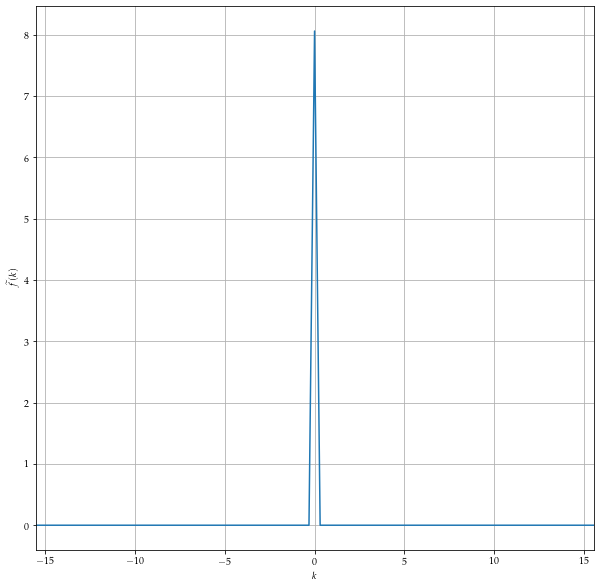

In [454]:
f6 = plt.figure(figsize=(10,10))
plt.xlabel("$k$")
plt.ylabel("$\widetilde{f}(k)$")
plt.grid()
plt.margins(x=0)
plt.plot(k,ft_dft)

# Problem 10

In [267]:
meshlim = 500
meshsize = 5001
x = np.linspace(-meshlim, meshlim, meshsize)
y = np.linspace(-meshlim, meshlim, meshsize)
# full coordinate arrays
xx, yy = np.meshgrid(x, y)
zz = np.exp(-(xx**2 + yy**2))
xx.shape, yy.shape, zz.shape

((5001, 5001), (5001, 5001), (5001, 5001))

In [268]:
Delta = 2*meshlim/(meshsize-1)
kx = (2*np.pi/(meshsize*Delta))*np.arange(-(meshsize-1)/2,(meshsize-1)/2+1)
ky = (2*np.pi/(meshsize*Delta))*np.arange(-(meshsize-1)/2,(meshsize-1)/2+1)
kxx, kyy = np.meshgrid(kx, ky)
kzz = 0.5*np.exp(-(kxx**2+kyy**2)/4)

In [269]:
omegazz = np.fft.fft2(zz,norm="ortho")
omegazz = np.fft.fftshift(omegazz)

In [270]:
factor = (Delta**2)*(meshsize/(2*np.pi))*np.exp(-1j*(kxx*np.min(x)+kyy*np.min(y)))
ft_omegazz = factor*omegazz

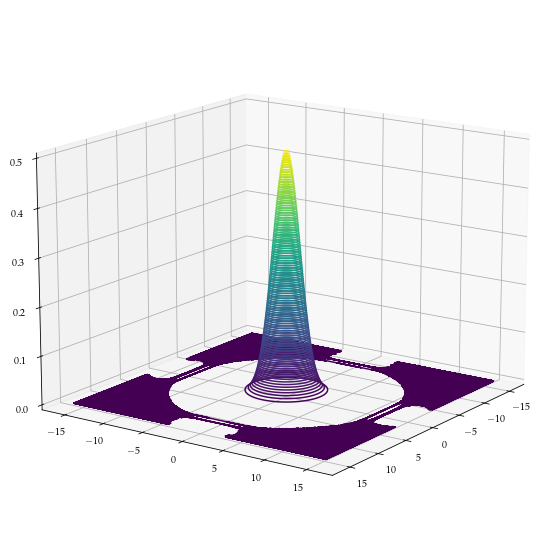

In [271]:
fig1 = plt.figure(figsize=(10,10))
ax1 = plt.axes(projection='3d')
ax1.contour3D(kxx, kyy, ft_omegazz,100)
ax1.view_init(15, 35)
plt.show()

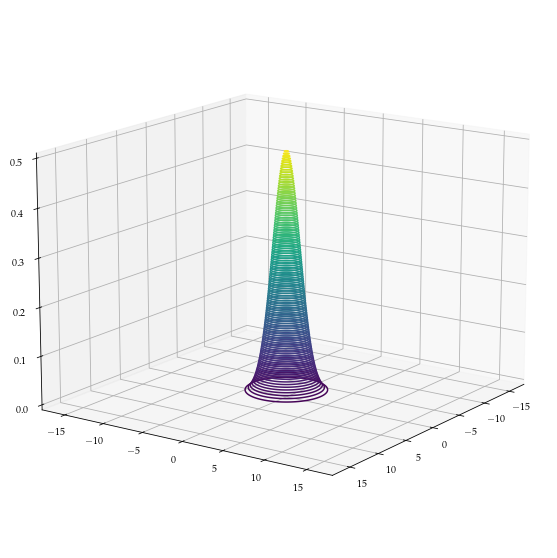

In [272]:
fig2 = plt.figure(figsize=(10,10))
ax2 = plt.axes(projection='3d')
ax2.contour3D(kx, ky, kzz, 100)
ax2.view_init(15, 35)
plt.show()

In [273]:
np.allclose(ft_omegazz,kzz)

True

# Problem 11

In [489]:
def box_fn(x):
    if abs(x)<1:
        return 1
    else:
        return 0
    
xlim = 4
n = 1001
Delta = 2*xlim/(n-1)
x = np.linspace(-xlim, xlim, n)
fx = np.vectorize(box_fn,otypes=[float])(x)

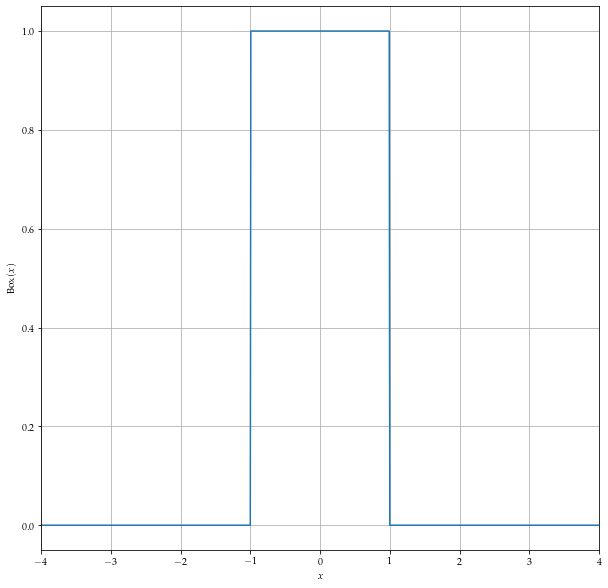

In [490]:
f11_1 = plt.figure(figsize=(10,10))
plt.xlabel("$x$")
plt.ylabel("Box$(x)$")
plt.grid()
plt.margins(x=0)
plt.plot(x,fx)

In [491]:
dft_box = dft(fx)
conv = Delta*np.sqrt(n)*idft(dft_box**2)
conv = shift(conv)

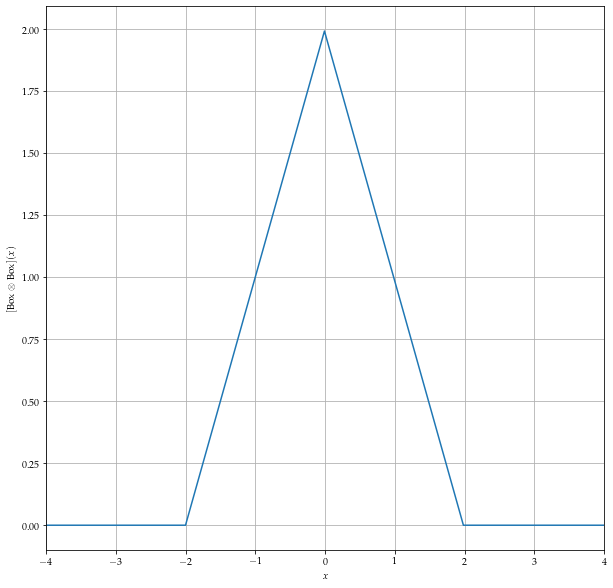

In [496]:
f11_2 = plt.figure(figsize=(10,10))
plt.xlabel("$x$")
plt.ylabel("$[$Box $\otimes$ Box$](x)$")
plt.grid()
plt.margins(x=0)
plt.plot(x,conv)

# Problem 12

In [633]:
def g(x):
    return np.exp(-x**2)

def h(x):
    return np.exp(-4*x**2)
    
xlim = 5
n = 101
Delta = 2*xlim/(n-1)
x = np.linspace(-xlim, xlim, n)
gx = np.append(np.vectorize(g,otypes=[float])(x[0:n]),np.zeros(n-1))
hx = np.append(np.vectorize(h,otypes=[float])(x[0:n]),np.zeros(n-1))

In [634]:
dft_g = np.fft.fft(gx,norm="ortho")
dft_h = np.fft.fft(hx,norm="ortho")
conv = Delta*np.sqrt(2*n-1)*np.fft.ifft(dft_g*dft_h,norm="ortho")

In [635]:
def true_conv(x):
    return np.sqrt(np.pi/5)*np.exp(-(4*x**2)/5)

true_convx = np.vectorize(true_conv,otypes=[float])(x)

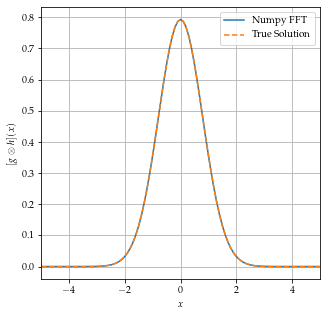

In [636]:
f12 = plt.figure(figsize=(5,5))
plt.xlabel("$x$")
plt.ylabel("$[g\otimes h](x)$")
plt.grid()
plt.margins(x=0)
plt.plot(x,conv[int((2*n-1)/4):int(3*(2*n-1)/4+1)],label='Numpy FFT')
plt.plot(x,true_convx,'--',label='True Solution')
plt.legend()

# Problem 13

In [628]:
dataframe = pd.read_csv('q13_data.csv')
print(dataframe)

     -0.268893148
0       -0.281008
1       -0.192248
2        0.309198
3        0.222225
4        0.161341
..            ...
506      0.217758
507      0.087910
508     -0.018282
509     -0.340285
510     -0.192735

[511 rows x 1 columns]


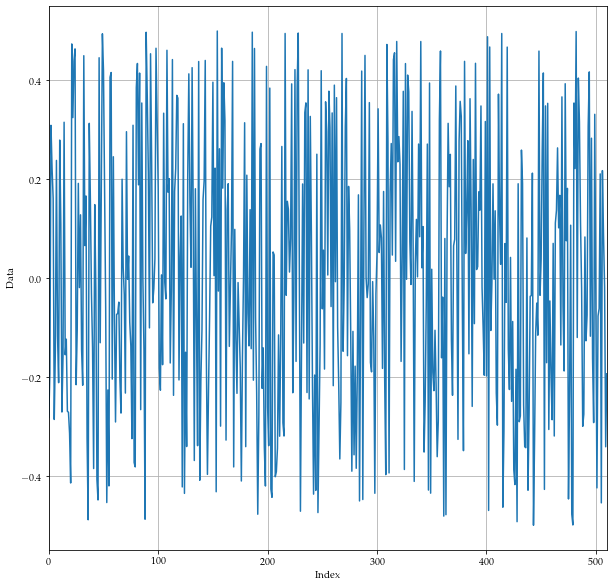

In [641]:
data_array = dataframe.to_numpy()

f13_1 = plt.figure(figsize=(10,10))
plt.xlabel("Index")
plt.ylabel("Data")
plt.grid()
plt.margins(x=0)
plt.plot(data_array)

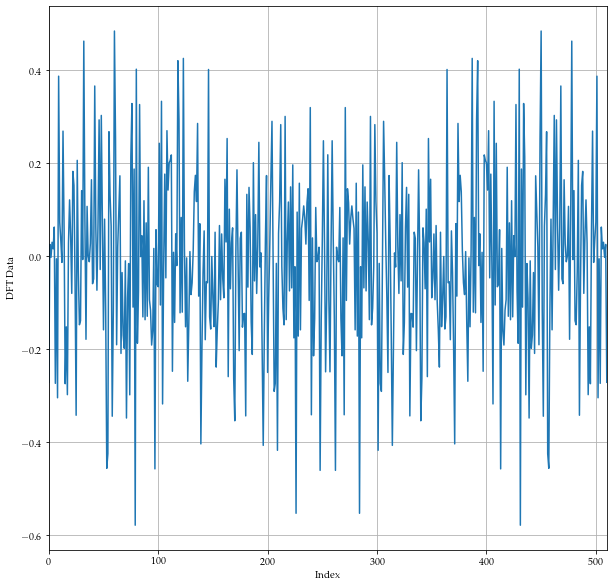

In [642]:
dft_data = dft(data_array)
dft_data = shift(dft_data)

f13_2 = plt.figure(figsize=(10,10))
plt.xlabel("Index")
plt.ylabel("DFT Data")
plt.grid()
plt.margins(x=0)
plt.plot(dft_data)

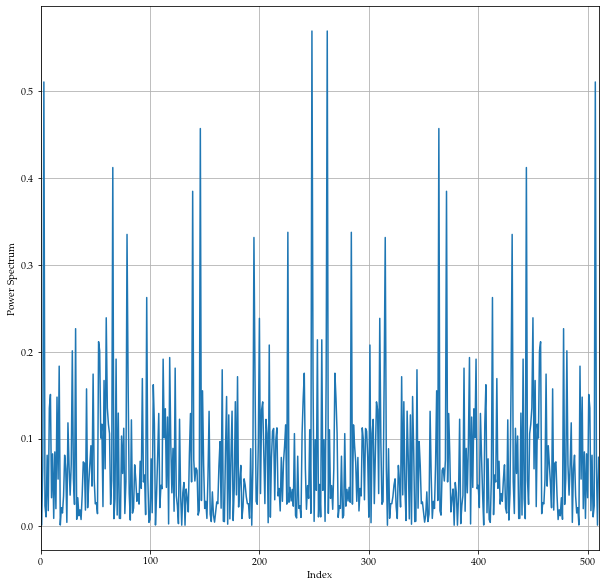

In [643]:
periodogram = np.abs(dft_data)**2

f13_3 = plt.figure(figsize=(10,10))
plt.xlabel("Index")
plt.ylabel("Power Spectrum")
plt.grid()
plt.margins(x=0)
plt.plot(periodogram)

<BarContainer object of 10 artists>

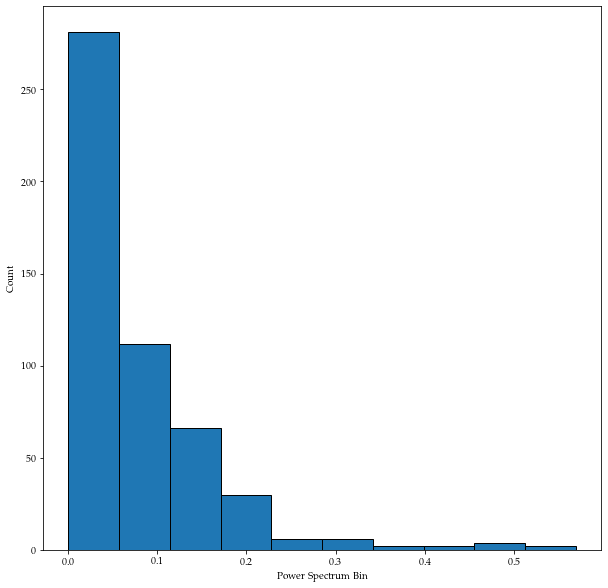

In [652]:
hist, bin_edges = np.histogram(periodogram,bins=10)

f13_4 = plt.figure(figsize=(10,10))
plt.xlabel("Power Spectrum Bin")
plt.ylabel("Count")
plt.bar(bin_edges[:-1],hist,width=np.diff(bin_edges), edgecolor="black", align="edge")